In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

# How did the retail trade change in the past ten years? and How did covid-19 inflence retail industry in 2020?
## z5216982
## Yixie Zhuang

In [72]:
plt.rcParams['figure.figsize'] = (10,8)
saved_style_state = matplotlib.rcParams.copy() 
pd.set_option('display.width', 5000)

# Monthly sales of retail industry in Australia(2010-2020)
#### provided by ABS(Australia Bureau of Statistics), url: 'https://stat.data.abs.gov.au/Index.aspx?DataSetCode=RT'
#### Region: Australia
#### Data type: Current Prices ($ Million)
#### Frequentley：Monthly

In [73]:
table_total  =pd.read_excel('AUS_monthlyretail.xlsx', sheet_name = 'AUS_RETAIL',header = 0,index_col = 0)
print(table_total)

             Total  Food retailing  Household goods  clothing, footwear  department store  other retailing  Café, restaurant
Time                                                                                                                        
Jan-2010  19791.97         8093.40          3560.98             1545.90           1469.10          2601.33           2521.26
Feb-2010  17431.46         7243.10          3052.52             1273.58           1111.89          2426.44           2323.94
Mar-2010  19490.29         8017.83          3322.76             1452.31           1379.91          2709.94           2607.53
Apr-2010  19031.97         7835.59          3213.83             1507.46           1389.67          2549.64           2535.78
May-2010  19533.58         7887.60          3360.08             1653.57           1427.24          2633.66           2571.44
...            ...             ...              ...                 ...               ...              ...               ...


In [74]:
plt.rcParams['figure.figsize'] = (12,8)
x_1 = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_increasing = []
for j in range(10):
    one_year_total_1 = np.sum(table_total.iloc[0+j*12:12+j*12,0])
    one_year_total_2 = np.sum(table_total.iloc[12+j*12:24+j*12,0])
    y_increasing_rate = (one_year_total_2 - one_year_total_1)/one_year_total_1*100
    y_increasing.append(y_increasing_rate)
plt.plot(x_1, y_increasing,linewidth = 1, marker ='*',markersize =10,color = 'b',label = 'increasing ratio(%)')
plt.ylim(0,7)
plt.xlabel('Year', fontdict = {'size':15}) 
plt.ylabel("increasing ratio (%)", fontdict = {'size':15},horizontalalignment = 'center')
plt.twinx()
x_2=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_year_total_sales = []
for i in range(11):
    one_year_total = np.sum(table_total.iloc[0+i*12:12+i*12,0])
    y_year_total_sales.append(one_year_total)
plt.bar(x_2 , y_year_total_sales, width = 0.6,alpha = 0.4, label ='Million $')
plt.title(label = 'Total Retail Sales', fontdict = {'color':'k', 'size': 30}, loc= 'center')
plt.ylim(200000,370000)






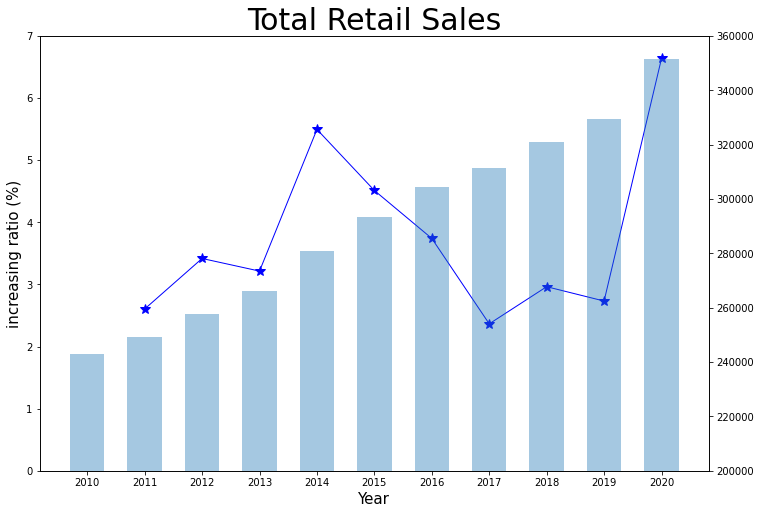

In [75]:
Total_reatil_sales_Aus()

# So there is a question why retail sales can increase rather than decrease in 2020?

In [91]:
def average_and_2020_retail_sales_proportion():    
    plt.rcParams['figure.figsize'] = (14,8)
    table_total  =pd.read_excel('AUS_monthlyretail.xlsx', sheet_name = 'AUS_RETAIL',header = 0,index_col = 0)
    x = ['Food Retailing','Household goods','clothing&footwear', 'department store', 'other retailing','cafe&restaurant']
    y = []
    for i in range(6):
        coloumn_excpet2020 = table_total.iloc[:120 , i+1]
        sum_money = np.sum(coloumn_excpet2020)
        y.append(sum_money)
    plt.subplot(1,2,1)    
    plt.pie(y,labels= x ,labeldistance = 1.2, autopct = '%.1f%%',pctdistance = 0.8,textprops={'fontsize':13})
    plt.title(label='Different retail industry pie chart(2010~2019)', fontdict={'color':'k','size':17})
    y = []
    for i in range(6):
        coloumn_excpet2020 = table_total.iloc[120 : , i+1]
        sum_money = np.sum(coloumn_excpet2020)
        y.append(sum_money)
    plt.subplot(1,2,2)
    plt.pie(y,labels=x,labeldistance = 1.2, autopct = '%.1f%%',pctdistance = 0.8,textprops={'fontsize':13})
    plt.title(label='Different retail industry pie chart(2020)', fontdict={'color':'k','size':17})
    plt.show()




## Compare proportion of different catogoires of retail indusry

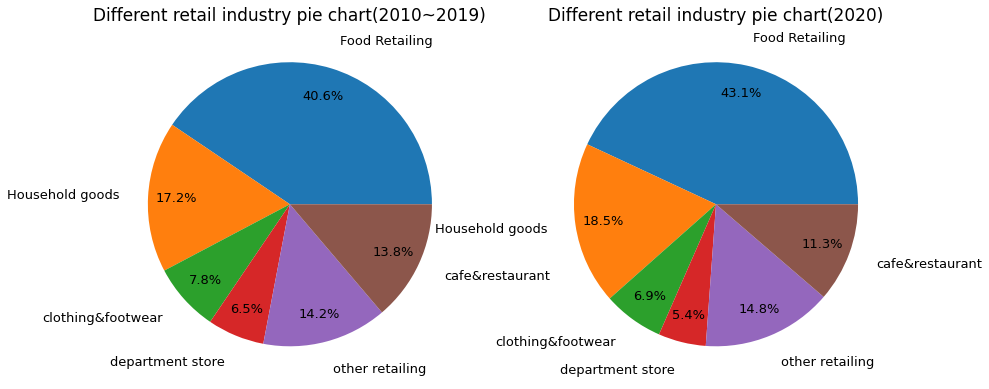

In [92]:
average_and_2020_retail_sales_proportion()

## unfair to find out difference only from comparing the average value

In [78]:
x = ['Food Retailing','Household goods','clothing&footwear', 'department store', 'other retailing','cafe&restaurant']
plt.rcParams['figure.figsize'] = (15, 10)
for j in range (6):
    y = []
    for i in range(6):
        coloumn_2019 = table_total.iloc[60+12*j:72+12*j , i+1]
        sum_money = np.sum(coloumn_2019)
        y.append(sum_money)
    plt.subplot(2,3,j+1)
    plt.pie(y,labels= x ,labeldistance = 1.1, autopct = '%.1f%%',pctdistance = 0.8,textprops={'fontsize':10})
    year = str(2015+j)
    plt.title(label=f'different retail industry pie chart{year}', fontdict={'color':'k','size':15})
    
plt.show()


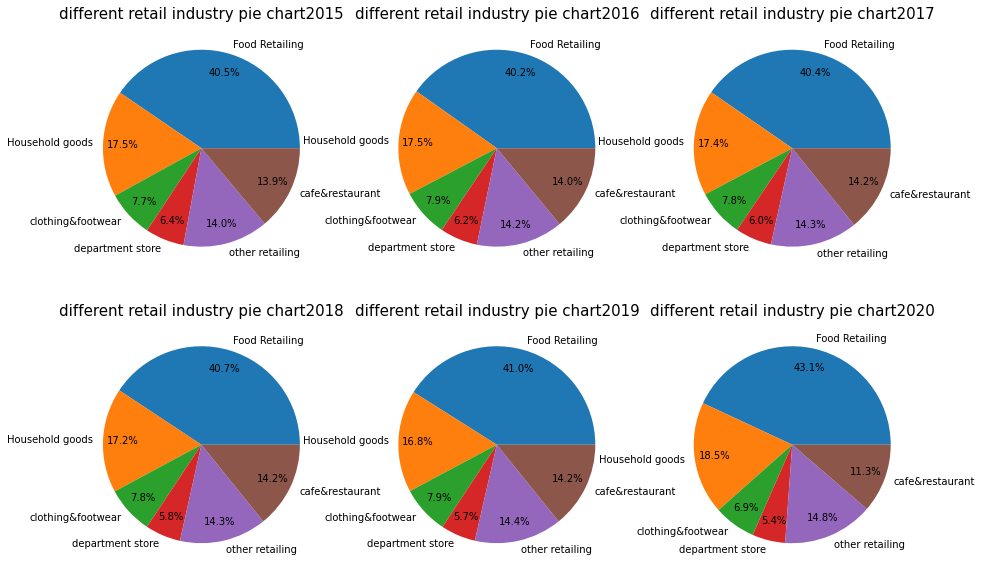

In [79]:
five_years_and_2020_comparison()

## Covid-19 indeed influence the structure of retail industry in 2020

In [80]:
def monthly_retail_sales_aus():
    plt.rcParams['figure.figsize'] = (12, 8)
    x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    y_2010 = table_total.iloc[0 : 12 , 0]
    y_2011 = table_total.iloc[12 : 24 , 0]
    y_2012 = table_total.iloc[24 : 36 , 0]
    y_2013 = table_total.iloc[36 : 48 , 0]
    y_2014 = table_total.iloc[48 : 60 , 0]
    y_2015 = table_total.iloc[60 : 72 , 0]
    y_2016 = table_total.iloc[72 : 84 , 0]
    y_2017 = table_total.iloc[84 : 96 , 0]
    y_2018 = table_total.iloc[96 : 108 , 0]
    y_2019 = table_total.iloc[108 : 120 , 0]
    y_2020 = table_total.iloc[120 : 132 , 0]
    plt.ylim(17000,39000)
    plt.plot(x, y_2010, linestyle ='dashdot', label='2010')
    plt.plot(x, y_2011, linestyle ='dashdot',label='2011')
    plt.plot(x, y_2012, linestyle ='dashdot',label='2012')
    plt.plot(x, y_2013, linestyle ='dashdot',label='2013')
    plt.plot(x, y_2014, linestyle ='dashdot',label='2014')
    plt.plot(x, y_2015, linestyle ='dashdot',label='2015')
    plt.plot(x, y_2016, linestyle ='dashdot',label='2016')
    plt.plot(x, y_2017, linestyle ='dashdot',label='2017')
    plt.plot(x, y_2018, linestyle ='dashdot',label='2018')
    plt.plot(x, y_2019, linestyle ='dashdot',label='2019')
    plt.plot(x, y_2020,marker='*', ms=10, mfc='y',color ='r', linewidth = 3, label='2020')
    plt.grid(b= True, color = 'k', linestyle ='dotted',linewidth =0.5)
    plt.legend()  
    plt.margins(0)
    plt.subplots_adjust(bottom=0.10)
    plt.xlabel('Month') 
    plt.ylabel("Monthly Retail Sales(million $)") 
    plt.title(label = 'Monthly Australia Retail Sales Line Chart', fontdict = {'color':'k', 'size': 30}, loc= 'center')
    plt.show()


## Does every year has similar retail trend ?
## Was the 2020 retail trend different from former years'? 

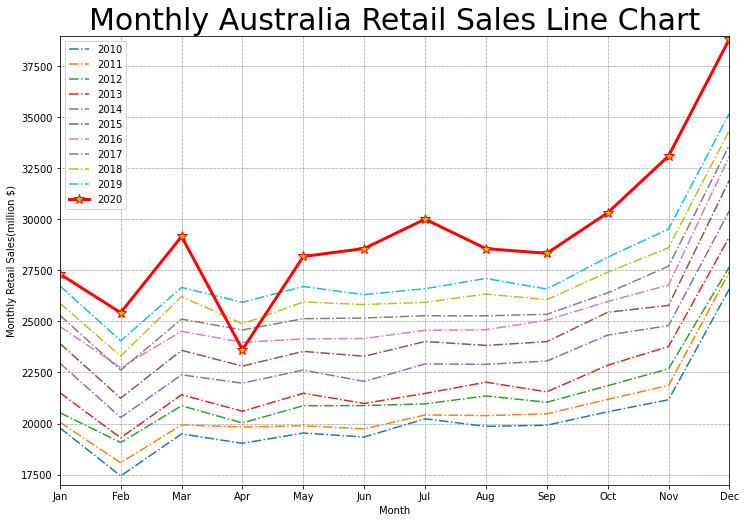

In [81]:
monthly_retail_sales_aus()

In [128]:
def increasing_sales_catogories():
    plt.rcParams['figure.figsize'] = (30, 8)
    x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    increasing_list = [1,2,5]
    for j in increasing_list:
        y_2010 = table_total.iloc[0 : 12 , j]
        y_2011 = table_total.iloc[12 : 24 , j]
        y_2012 = table_total.iloc[24 : 36 , j]
        y_2013 = table_total.iloc[36 : 48 , j]
        y_2014 = table_total.iloc[48 : 60 , j]
        y_2015 = table_total.iloc[60 : 72 , j]
        y_2016 = table_total.iloc[72 : 84 , j]
        y_2017 = table_total.iloc[84 : 96 , j]
        y_2018 = table_total.iloc[96 : 108 , j]
        y_2019 = table_total.iloc[108 : 120 , j]
        y_2020 = table_total.iloc[120 : 132 , j]
        if j == 1:
            plt.subplot(1,3,1)
        if j == 2:
            plt.subplot(1,3,2)
        if j == 5:
            plt.subplot(1,3,3)
        plt.plot(x, y_2010, linestyle ='dashdot', label='2010')
        plt.plot(x, y_2011, linestyle ='dashdot',label='2011')
        plt.plot(x, y_2012, linestyle ='dashdot',label='2012')
        plt.plot(x, y_2013, linestyle ='dashdot',label='2013')
        plt.plot(x, y_2014, linestyle ='dashdot',label='2014')
        plt.plot(x, y_2015, linestyle ='dashdot',label='2015')
        plt.plot(x, y_2016, linestyle ='dashdot',label='2016')
        plt.plot(x, y_2017, linestyle ='dashdot',label='2017')
        plt.plot(x, y_2018, linestyle ='dashdot',label='2018')
        plt.plot(x, y_2019, linestyle ='dashdot',label='2019')
        plt.plot(x, y_2020,marker='*', ms=10, mfc='y',color ='r', linewidth = 3, label='2020')
        plt.grid(b= True, color = 'k', linestyle ='dotted',linewidth =0.5)
        plt.legend(loc = 'upper left')  
        plt.margins(0)
        plt.subplots_adjust(bottom=0.10)
        plt.xlabel('Month') 
        plt.ylabel("Monthly Retail Sales(million $)") 
        if j == 1:
            plt.ylim(7000,18000)
            plt.title(label = 'Monthly Food Retailing Sales Line Chart', fontdict = {'color':'k', 'size': 14}, loc= 'center')
        if j == 2:
            plt.title(label = 'Monthly Household Goods Retailing Sales Line Chart', fontdict = {'color':'k', 'size': 14}, loc= 'center')
        if j == 5:
            plt.title(label = 'Monthly other Retailing Sales Line Chart', fontdict = {'color':'k', 'size': 14}, loc= 'center')


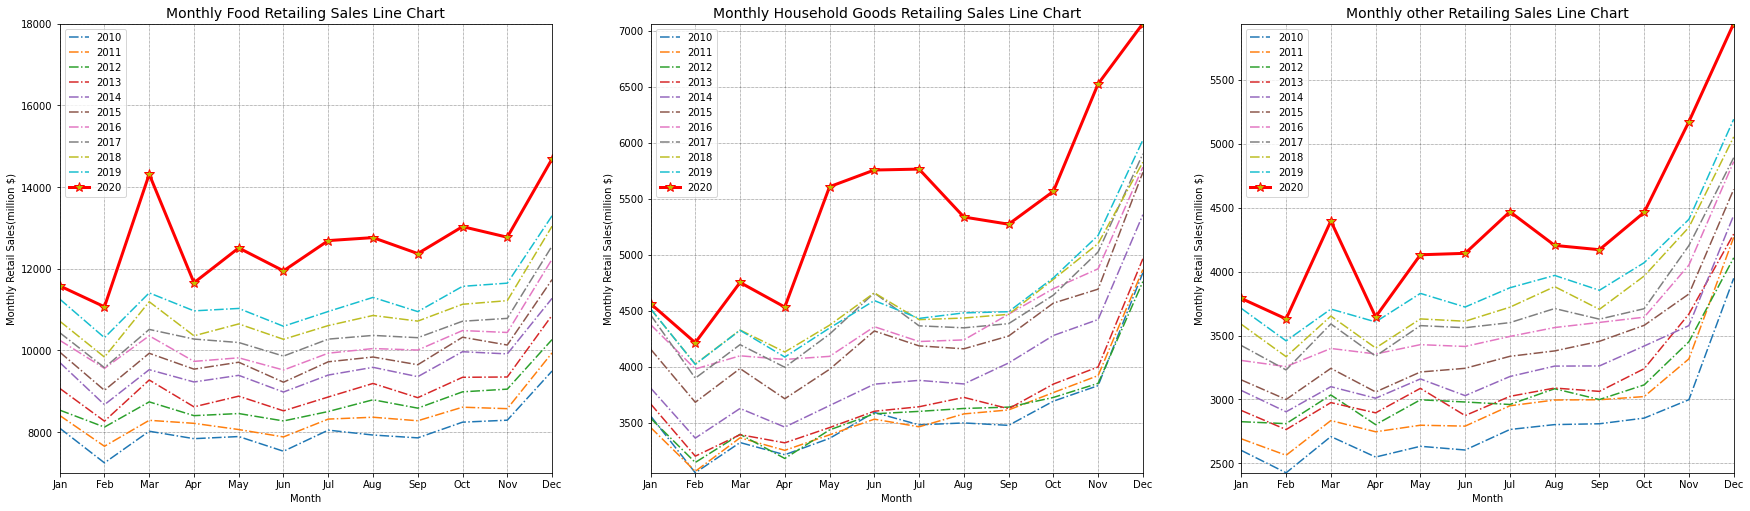

In [129]:
increasing_sales_catogories()   

## Contributing a lot to augementation of retail turnover in 2020

In [126]:
def decreasing_sales_catogories():
    
    plt.rcParams['figure.figsize'] = (30, 8)
    x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    increasing_list = [3,4,6]
    for j in increasing_list:
        y_2010 = table_total.iloc[0 : 12 , j]
        y_2011 = table_total.iloc[12 : 24 , j]
        y_2012 = table_total.iloc[24 : 36 , j]
        y_2013 = table_total.iloc[36 : 48 , j]
        y_2014 = table_total.iloc[48 : 60 , j]
        y_2015 = table_total.iloc[60 : 72 , j]
        y_2016 = table_total.iloc[72 : 84 , j]
        y_2017 = table_total.iloc[84 : 96 , j]
        y_2018 = table_total.iloc[96 : 108 , j]
        y_2019 = table_total.iloc[108 : 120 , j]
        y_2020 = table_total.iloc[120 : 132 , j]
        if j == 3:
            plt.subplot(1,3,1)
        if j == 4:
            plt.subplot(1,3,2)
        if j == 6:
            plt.subplot(1,3,3)
        plt.plot(x, y_2010, linestyle ='dashdot', label='2010')
        plt.plot(x, y_2011, linestyle ='dashdot',label='2011')
        plt.plot(x, y_2012, linestyle ='dashdot',label='2012')
        plt.plot(x, y_2013, linestyle ='dashdot',label='2013')
        plt.plot(x, y_2014, linestyle ='dashdot',label='2014')
        plt.plot(x, y_2015, linestyle ='dashdot',label='2015')
        plt.plot(x, y_2016, linestyle ='dashdot',label='2016')
        plt.plot(x, y_2017, linestyle ='dashdot',label='2017')
        plt.plot(x, y_2018, linestyle ='dashdot',label='2018')
        plt.plot(x, y_2019, linestyle ='dashdot',label='2019')
        plt.plot(x, y_2020,marker='*', ms=10, mfc='y',color ='r', linewidth = 3, label='2020')
        plt.grid(b= True, color = 'k', linestyle ='dotted',linewidth =0.5)
        plt.legend()  
        plt.margins(0)
        plt.subplots_adjust(bottom=0.10)
        plt.xlabel('Month') 
        plt.ylabel("Monthly Retail Sales(million $)") 
        if j == 3:
            plt.ylim(500,4000)
            plt.title(label = 'Monthly Clothing&Footwear Sales Line Chart', fontdict = {'color':'k', 'size': 15}, loc= 'center')
        if j == 4:
            plt.title(label = 'Monthly Department store Retailing Sales Line Chart', fontdict = {'color':'k', 'size': 15}, loc= 'center')
        if j == 6:
            plt.ylim(1500,7000)
            plt.title(label = 'Monthly Cafe&Restaurant Retailing Sales Line Chart', fontdict = {'color':'k', 'size': 15}, loc= 'center')


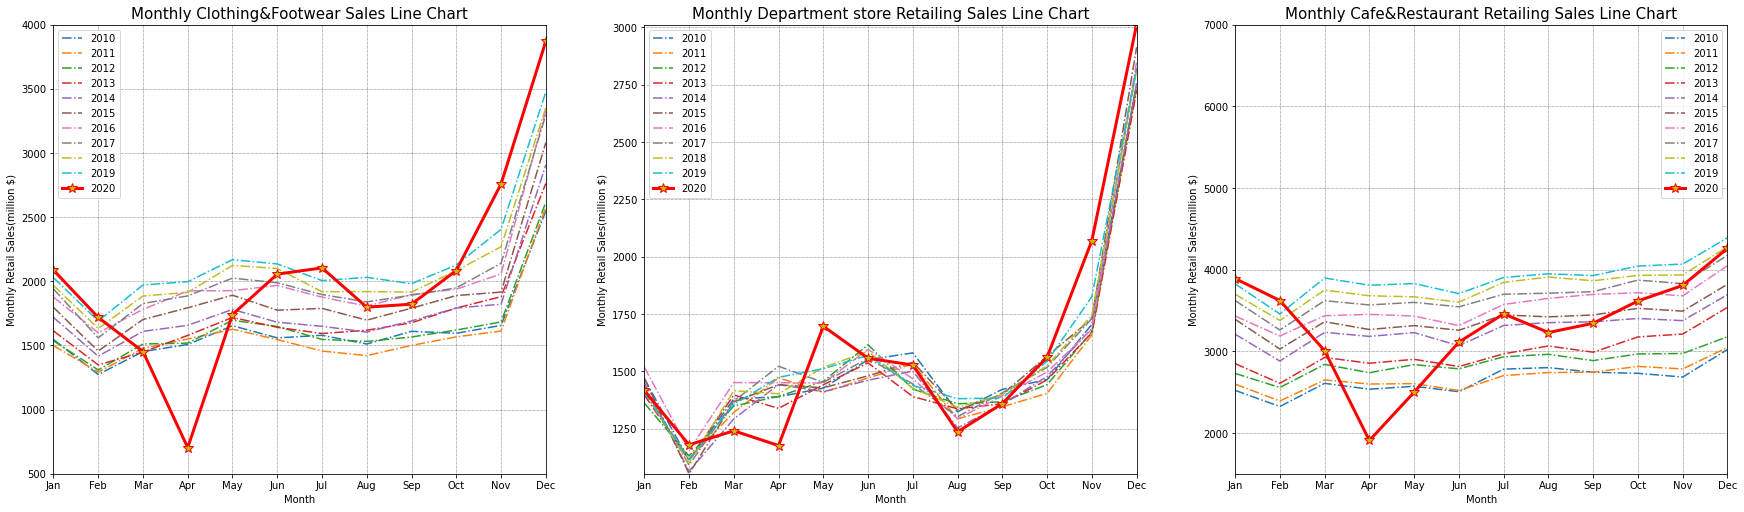

In [127]:
decreasing_sales_catogories()

In [86]:
def April_retail_sales():

    plt.rcParams['figure.figsize'] = (10, 6)
    Apr_sales = []
    for i in range(11):
        data_Apr = table_total.iloc[3+12*i,0]
        Apr_sales.append(data_Apr)
    increasing_Data_Apr =[]
    for j in range(10):
        increasingdata_Apr =(Apr_sales[j+1]-Apr_sales[j])*100/Apr_sales[j]
        increasing_Data_Apr.append(increasingdata_Apr)
    x = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
    plt.plot(x, increasing_Data_Apr,linewidth = 3, label ='increasing ratio(%)')
    plt.xlabel('Year', fontdict = {'size':15}) 
    plt.ylabel("increasing ratio (%)", fontdict = {'size':15}) 
    plt.legend(loc='upper left',fontsize =10)
    plt.twinx()
    plt.ylim(16000,26000)
    x = ['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
    plt.bar(x , Apr_sales, width = 0.6, color = 'c',alpha = 0.4, label ='Million $')
    plt.title(label = 'Retail Sales in April', fontdict = {'color':'k', 'size': 30}, loc= 'center')

    plt.ylabel("Retail Sales in April(million $)", fontdict = {'size':15}) 
    plt.legend(loc='upper right',fontsize =10)
    

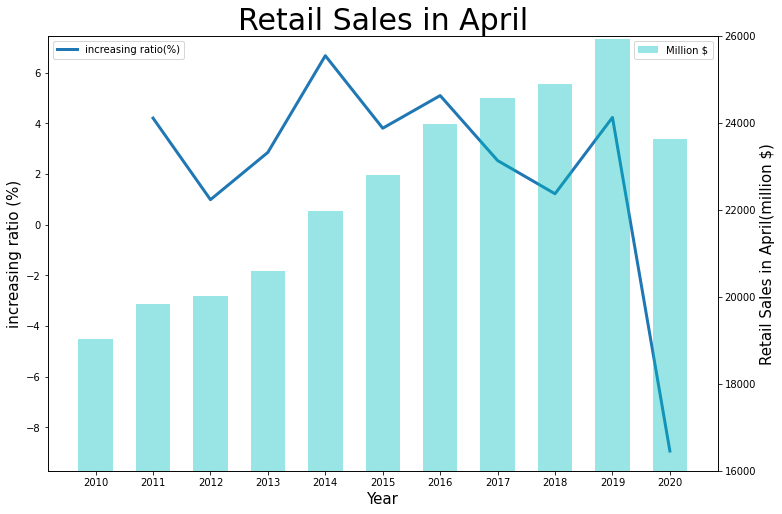

In [87]:
April_retail_sales()

In [93]:
def retail_sales_decemeber():

    plt.rcParams['figure.figsize'] = (10, 6)
    Dec_sales = []
    for i in range(11):
        data_Dec = table_total.iloc[11+12*i,0]
        Dec_sales.append(data_Dec)

    increasing_rate_dec = []
    for i in range(10):
        increasing_data = (Dec_sales[i+1]-Dec_sales[i])*100/Dec_sales[i]
        increasing_rate_dec.append(increasing_data)
    x = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
    plt.plot(x , increasing_rate_dec, linewidth = 3, marker ='*',markersize =15,color = 'g',label = 'increasing ratio(%)')
    plt.legend(loc='upper left')
    plt.title(label = 'Retail sales in December', fontdict = {'color':'k', 'size': 30}, loc= 'center')
    plt.xlabel('Year', fontdict = {'size':15}) 
    plt.ylabel("Increasing rate of sales(%)", fontdict = {'size':15}) 
    plt.twinx()
    x = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
    plt.ylim(25000,40000)
    plt.bar(x , Dec_sales, width = 0.6, color = 'g',alpha = 0.4, label ='Million $')
    plt.legend()
    



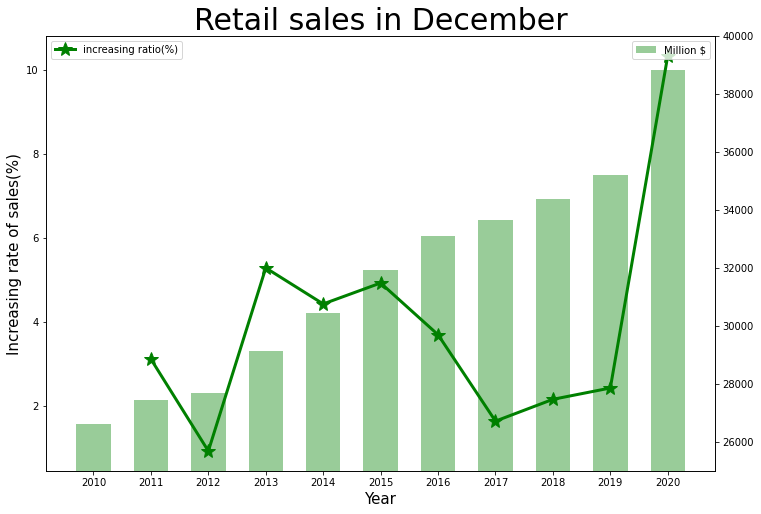

In [89]:
retail_sales_decemeber()


## Offset the decline in April